# Analyzing Plato's Dialogues with PCA
## Iris Wu (iw5hte@virginia.edu) DS 5001 Spring 2023

## End goal of this notebook:
- Produce a table of documents and components.
- Produce a table of components and word counts (i.e., the “loadings”), either added to the VOCAB table or as a separate table with a shared index with the VOCAB table.
- Explore the data

### Setting up necessary tools:

Importing useful packages -

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.linalg import norm
from scipy.linalg import eigh
import plotly.express as px
import nltk
import plotly.figure_factory as ff
from plotly.figure_factory import create_dendrogram # Built on top SciPy
from hac import HAC

Defining useful filepaths for reading and outputting data -

In [112]:
data_in = 'data/output'
data_out = 'data/output'
data_prefix = 'plato'

Setting up configurations - 

In [118]:
OHCO = ['book_id', 'chap_id', 'para_num']

### Importing the data

In [146]:
LIB = pd.read_csv(f"{data_in}/{data_prefix}-LIB.csv").set_index('book_id')
VOCAB = pd.read_csv(f'{data_in}/{data_prefix}-VOCAB-PARA.csv').set_index('term_str').dropna()
BOW = pd.read_csv(f'{data_in}/{data_prefix}-BOW-PARA.csv').set_index(OHCO+['term_str'])

### Reducing dimensions

What are the top 1000 most important words (vectors) by TFIDF weighting?

In [147]:
TFIDF = BOW['tfidf'].unstack(fill_value=0) 
VSHORT = VOCAB[VOCAB.max_pos.isin(['NN', 'VB', 'JJ'])].sort_values('dfidf', ascending=False).head(1000)
TFIDF = TFIDF[VSHORT.index]
TFIDF

term_str                        be  other      true       say  good  man  \
book_id chap_id para_num                                                   
1497    1       1         0.000000    0.0  0.000000  0.000000   0.0  0.0   
                2         0.000000    0.0  0.000000  0.000000   0.0  0.0   
                3         0.000000    0.0  0.000000  0.000000   0.0  0.0   
                4         0.000000    0.0  0.000000  0.000000   0.0  0.0   
                5         0.000000    0.0  0.000000  0.000000   0.0  0.0   
...                            ...    ...       ...       ...   ...  ...   
1750    12      121       0.031643    0.0  0.000000  0.013592   0.0  0.0   
                122       0.000000    0.0  0.000000  0.000000   0.0  0.0   
                123       0.000000    0.0  0.251828  0.000000   0.0  0.0   
                124       0.000000    0.0  0.000000  0.000000   0.0  0.0   
                127       0.000000    0.0  0.000000  0.000000   0.0  0.0   

term_str                  same      such  let  know  ...  tongue  opportunity  \
book_id chap_id para_num                             ...                        
1497    1       1          0.0  0.000000  0.0   0.0  ...     0.0          0.0   
                2          0.0  0.000000  0.0   0.0  ...     0.0          0.0   
                3          0.0  0.000000  0.0   0.0  ...     0.0          0.0   
                4          0.0  0.000000  0.0   0.0  ...     0.0          0.0   
                5          0.0  0.000000  0.0   0.0  ...     0.0          0.0   
...                        ...       ...  ...   ...  ...     ...          ...   
1750    12      121        0.0  0.017127  0.0   0.0  ...     0.0          0.0   
                122        0.0  0.000000  0.0   0.0  ...     0.0          0.0   
                123        0.0  0.000000  0.0   0.0  ...     0.0          0.0   
                124        0.0  0.000000  0.0   0.0  ...     0.0          0.0   
                127        0.0  0.000000  0.0   0.0  ...     0.0          0.0   

term_str                  intemperate  clearness  immortality  musician  sir  \
book_id chap_id para_num                                                       
1497    1       1                 0.0        0.0          0.0       0.0  0.0   
                2                 0.0        0.0          0.0       0.0  0.0   
                3                 0.0        0.0          0.0       0.0  0.0   
                4                 0.0        0.0          0.0       0.0  0.0   
                5                 0.0        0.0          0.0       0.0  0.0   
...                               ...        ...          ...       ...  ...   
1750    12      121               0.0        0.0          0.0       0.0  0.0   
                122               0.0        0.0          0.0       0.0  0.0   
                123               0.0        0.0          0.0       0.0  0.0   
                124               0.0        0.0          0.0       0.0  0.0   
                127               0.0        0.0          0.0       0.0  0.0   

term_str                  legislate  shame  strike  
book_id chap_id para_num                            
1497    1       1               0.0    0.0     0.0  
                2               0.0    0.0     0.0  
                3               0.0    0.0     0.0  
                4               0.0    0.0     0.0  
                5               0.0    0.0     0.0  
...                             ...    ...     ...  
1750    12      121             0.0    0.0     0.0  
                122             0.0    0.0     0.0  
                123             0.0    0.0     0.0  
                124             0.0    0.0     0.0  
                127             0.0    0.0     0.0  

[19972 rows x 1000 columns]

### Normalize the data

In [128]:
TFIDF_L2 = (TFIDF.T / norm(TFIDF, 2, axis=1)).T
TFIDF_L2 = TFIDF_L2 - TFIDF_L2.mean()
TFIDF_L2 = TFIDF_L2.dropna()
TFIDF_L2

term_str                        be     other      true       say      good  \
book_id chap_id para_num                                                     
1497    1       1        -0.061075 -0.025736 -0.087249 -0.032062 -0.028786   
                2        -0.061075 -0.025736 -0.087249 -0.032062 -0.028786   
                3        -0.061075 -0.025736 -0.087249 -0.032062 -0.028786   
                4        -0.061075 -0.025736 -0.087249 -0.032062 -0.028786   
                5        -0.061075 -0.025736 -0.087249 -0.032062 -0.028786   
...                            ...       ...       ...       ...       ...   
1750    12      119       0.268876 -0.025736 -0.087249 -0.032062 -0.028786   
                121       0.071884 -0.025736 -0.087249  0.025049 -0.028786   
                122      -0.061075 -0.025736 -0.087249 -0.032062 -0.028786   
                123      -0.061075 -0.025736  0.245251 -0.032062 -0.028786   
                127      -0.061075 -0.025736 -0.087249 -0.032062 -0.028786   

term_str                       man      same      such       let      know  \
book_id chap_id para_num                                                     
1497    1       1        -0.017744 -0.019048 -0.013897 -0.015158 -0.019009   
                2        -0.017744 -0.019048 -0.013897 -0.015158 -0.019009   
                3        -0.017744 -0.019048 -0.013897 -0.015158 -0.019009   
                4        -0.017744 -0.019048 -0.013897 -0.015158 -0.019009   
                5        -0.017744 -0.019048 -0.013897 -0.015158 -0.019009   
...                            ...       ...       ...       ...       ...   
1750    12      119      -0.017744 -0.019048 -0.013897 -0.015158  0.085377   
                121      -0.017744 -0.019048  0.058070 -0.015158 -0.019009   
                122      -0.017744 -0.019048 -0.013897 -0.015158 -0.019009   
                123      -0.017744 -0.019048 -0.013897 -0.015158 -0.019009   
                127      -0.017744 -0.019048 -0.013897 -0.015158 -0.019009   

term_str                  ...    tongue  opportunity  intemperate  clearness  \
book_id chap_id para_num  ...                                                  
1497    1       1         ... -0.000536    -0.000521    -0.000643  -0.000602   
                2         ... -0.000536    -0.000521    -0.000643  -0.000602   
                3         ... -0.000536    -0.000521    -0.000643  -0.000602   
                4         ... -0.000536    -0.000521    -0.000643  -0.000602   
                5         ... -0.000536    -0.000521    -0.000643  -0.000602   
...                       ...       ...          ...          ...        ...   
1750    12      119       ... -0.000536    -0.000521    -0.000643  -0.000602   
                121       ... -0.000536    -0.000521    -0.000643  -0.000602   
                122       ... -0.000536    -0.000521    -0.000643  -0.000602   
                123       ... -0.000536    -0.000521    -0.000643  -0.000602   
                127       ... -0.000536    -0.000521    -0.000643  -0.000602   

term_str                  immortality  musician       sir  legislate  \
book_id chap_id para_num                                               
1497    1       1            -0.00037 -0.000864 -0.000709  -0.000438   
                2            -0.00037 -0.000864 -0.000709  -0.000438   
                3            -0.00037 -0.000864 -0.000709  -0.000438   
                4            -0.00037 -0.000864 -0.000709  -0.000438   
                5            -0.00037 -0.000864 -0.000709  -0.000438   
...                               ...       ...       ...        ...   
1750    12      119          -0.00037 -0.000864 -0.000709  -0.000438   
                121          -0.00037 -0.000864 -0.000709  -0.000438   
                122          -0.00037 -0.000864 -0.000709  -0.000438   
                123          -0.00037 -0.000864 -0.000709  -0.000438   
                127          -0.00037 -0.000864 -0.000709  -0.000

### Calculate the covariance matrix

In [129]:
COV = TFIDF_L2.T.dot(TFIDF_L2) / (TFIDF_L2.shape[0] - 1)
COV

term_str,be,other,true,say,good,man,same,such,let,know,...,tongue,opportunity,intemperate,clearness,immortality,musician,sir,legislate,shame,strike
term_str,,,,,,,,,,,,,,,,,,,,,
be,0.017375,0.000689,-0.003930,-0.000736,-0.000298,0.000131,0.000290,2.736476e-04,3.166000e-04,-3.144326e-04,...,8.168185e-06,1.173982e-05,6.510871e-06,-1.196936e-05,8.602991e-06,-2.400705e-05,-4.203462e-06,1.569251e-05,-5.467373e-06,7.298957e-06
other,0.000689,0.008336,-0.001943,-0.000132,-0.000189,0.000077,0.000771,8.642854e-05,-2.406480e-05,-8.454348e-05,...,2.178290e-05,4.438445e-06,6.328926e-07,-9.291481e-07,3.036609e-06,-1.017130e-05,-1.420268e-05,-3.691015e-06,8.679029e-06,5.853396e-06
true,-0.003930,-0.001943,0.072622,-0.002163,-0.002198,-0.001323,-0.001432,-1.027593e-03,-1.187917e-03,-1.490656e-03,...,-4.117805e-05,-4.285816e-05,-4.654171e-05,-4.204776e-05,-2.486050e-05,-6.015577e-05,-6.145986e-05,-3.768688e-05,-3.791937e-05,-3.267445e-05
say,-0.000736,-0.000132,-0.002163,0.014966,-0.000103,0.000092,0.000086,-4.741455e-05,8.800726e-07,5.854396e-05,...,1.336626e-06,1.837102e-06,-1.285629e-05,-3.550482e-06,-5.383220e-06,-1.988718e-05,-1.614084e-05,5.455200e-06,-4.717174e-06,-7.618856e-06
good,-0.000298,-0.000189,-0.002198,-0.000103,0.013641,0.000372,-0.000055,-9.796026e-05,-1.303563e-04,-6.417381e-05,...,-2.656096e-06,-9.539122e-06,1.005361e-05,-1.545020e-05,-7.925805e-06,-7.723103e-06,1.065152e-04,-4.792869e-06,-4.740540e-06,4.048686e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
musician,-0.000024,-0.000010,-0.000060,-0.000020,-0.000008,0.000033,0.000010,-3.439399e-06,-1.309042e-05,2.438122e-05,...,-4.628833e-07,-4.495866e-07,-5.550899e-07,-5.197466e-07,-3.196009e-07,5.394926e-04,-6.120013e-07,-3.784074e-07,-4.023284e-07,-3.442306e-07
sir,-0.000004,-0.000014,-0.000061,-0.000016,0.000107,0.000014,-0.000006,2.184405e-07,-4.294006e-08,2.540820e-06,...,-3.798582e-07,-3.689464e-07,8.155260e-06,-4.265223e-07,-2.622757e-07,-6.120013e-07,3.869833e-04,5.548388e-07,-3.301648e-07,-2.824876e-07
legislate,0.000016,-0.000004,-0.000038,0.000005,-0.000005,0.000008,-0.000003,1.593687e-05,9.323691e-07,-6.726142e-06,...,-2.348707e-07,-2.281238e-07,-2.816571e-07,2.054692e-06,-1.621681e-07,-3.784074e-07,5.548388e-07,1.785752e-04,3.457517e-07,-1.746654e-07


### Perform eigenanalysis on the covariance matrix to get the principal component analysis

In [130]:
eig_vals, eig_vecs = eigh(COV)
EIG_VEC = pd.DataFrame(eig_vecs, index=COV.index, columns=COV.index)
EIG_VAL = pd.DataFrame(eig_vals, index=COV.index, columns=['eig_val'])
EIG_VAL.index.name = 'term_str'

In [131]:
EIG_PAIRS = EIG_VAL.join(EIG_VEC.T).sort_values('eig_val', ascending=False)
EIG_PAIRS

,eig_val,be,other,true,say,good,man,same,such,let,...,tongue,opportunity,intemperate,clearness,immortality,musician,sir,legislate,shame,strike
term_str,,,,,,,,,,,,,,,,,,,,,
strike,0.073885,-0.069264,-0.030580,0.990344,-0.034680,-0.035316,-0.020124,-0.022201,-0.015234,-0.017743,...,-0.000591,-0.000615,-0.000643,-0.000568,-0.000382,-0.000764,-0.000875,-0.000544,-0.000515,-0.000459
shame,0.017862,0.933530,0.068499,0.054685,-0.280575,-0.095251,0.001127,0.025206,0.018445,0.019042,...,0.000430,0.000445,0.000414,-0.000692,0.000619,-0.001274,-0.000929,0.000816,-0.000223,0.000534
legislate,0.014788,-0.240215,-0.005829,-0.036101,-0.932005,0.246160,0.003290,-0.018022,-0.000073,-0.005684,...,-0.000185,-0.000289,0.001003,0.000318,0.000249,0.001676,0.003135,-0.000581,0.000406,0.000483
sir,0.013844,0.148967,-0.033166,0.043893,0.205270,0.941962,0.042574,-0.009622,-0.009299,-0.016722,...,-0.000356,-0.000853,0.000933,-0.001651,-0.000600,-0.001095,0.007033,-0.000082,-0.000431,0.000154
musician,0.010991,0.044343,-0.131987,0.006580,0.010398,0.051397,-0.022640,-0.108172,-0.021133,-0.023492,...,-0.000823,0.001177,-0.000187,-0.000317,-0.000762,-0.001334,0.000697,-0.000551,-0.000888,-0.000436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
good,0.000086,-0.000481,0.000127,-0.000298,0.000139,0.000521,-0.000041,-0.000059,-0.000582,-0.001234,...,0.031349,-0.002164,0.010452,0.005745,0.666982,0.001716,0.006900,0.008723,0.013946,-0.000579
say,0.000084,0.001033,0.000270,0.001186,0.000901,0.000472,0.000997,0.001069,0.000208,0.000964,...,0.034472,-0.001183,0.049404,-0.000690,-0.156251,0.001090,0.035497,0.031650,-0.000563,-0.018331
true,0.000067,0.000132,-0.000088,-0.000054,0.000148,-0.000149,-0.000330,0.000557,0.001334,0.001201,...,0.011038,-0.001400,-0.001538,-0.001536,-0.013648,-0.000581,-0.001801,-0.004876,-0.001557,0.003651


Which eigenvectors explain the most variance in the data and thus are our most important?

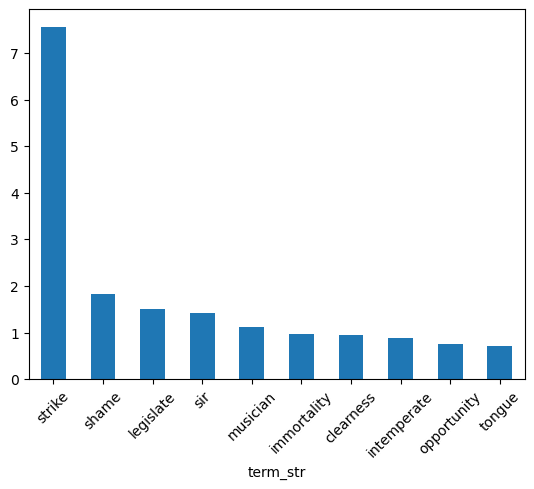

In [132]:
EIG_PAIRS['exp_var'] = np.round((EIG_PAIRS.eig_val / EIG_PAIRS.eig_val.sum()) * 100, 2)
EIG_PAIRS.exp_var.sort_values(ascending=False).head(10).plot.bar(rot=45);

Getting the principal components and examining the top ten eigenvectors

In [133]:
COMPS = EIG_PAIRS.sort_values('exp_var', ascending=False).head(10).reset_index(drop=True)
COMPS.index.name = 'comp_id'
COMPS.index = ["PC{}".format(i) for i in COMPS.index.tolist()]
COMPS.index.name = 'pc_id'
COMPS

,eig_val,be,other,true,say,good,man,same,such,let,...,opportunity,intemperate,clearness,immortality,musician,sir,legislate,shame,strike,exp_var
pc_id,,,,,,,,,,,,,,,,,,,,,
PC0,0.073885,-0.069264,-0.030580,0.990344,-0.034680,-0.035316,-0.020124,-0.022201,-0.015234,-0.017743,...,-0.000615,-0.000643,-0.000568,-0.000382,-0.000764,-0.000875,-0.000544,-0.000515,-0.000459,7.56
PC1,0.017862,0.933530,0.068499,0.054685,-0.280575,-0.095251,0.001127,0.025206,0.018445,0.019042,...,0.000445,0.000414,-0.000692,0.000619,-0.001274,-0.000929,0.000816,-0.000223,0.000534,1.83
PC2,0.014788,-0.240215,-0.005829,-0.036101,-0.932005,0.246160,0.003290,-0.018022,-0.000073,-0.005684,...,-0.000289,0.001003,0.000318,0.000249,0.001676,0.003135,-0.000581,0.000406,0.000483,1.51
PC3,0.013844,0.148967,-0.033166,0.043893,0.205270,0.941962,0.042574,-0.009622,-0.009299,-0.016722,...,-0.000853,0.000933,-0.001651,-0.000600,-0.001095,0.007033,-0.000082,-0.000431,0.000154,1.42
PC4,0.010991,0.044343,-0.131987,0.006580,0.010398,0.051397,-0.022640,-0.108172,-0.021133,-0.023492,...,0.001177,-0.000187,-0.000317,-0.000762,-0.001334,0.000697,-0.000551,-0.000888,-0.000436,1.12
PC5,0.009360,-0.084100,0.545902,0.023551,-0.016083,-0.001654,0.055651,0.413621,0.028911,0.004691,...,0.000719,0.000851,0.000711,0.001299,0.000254,-0.001267,0.000316,0.000798,0.000863,0.96
PC6,0.009141,-0.026941,0.170772,-0.011622,0.022414,0.009867,-0.027403,0.163369,0.001672,0.006187,...,-0.000266,0.000723,-0.000651,0.000559,-0.002928,-0.001026,0.000485,-0.000048,0.000761,0.94
PC7,0.008679,0.032447,0.418920,0.036235,0.029462,0.064484,-0.005086,0.402857,-0.031150,-0.076283,...,-0.000798,-0.001117,-0.001005,-0.000744,0.000784,-0.001308,-0.001350,-0.000557,-0.000472,0.89
PC8,0.007470,0.001941,0.599016,0.009679,0.023407,0.013262,0.014874,-0.758125,0.042456,0.037930,...,0.000973,0.000247,0.000276,0.000684,-0.001814,-0.000509,0.000479,0.001434,0.000626,0.76


Once we have cleaned the data, we can get the loadings, which are the ten most important eigenvectors and examine their contribution to the variance of each term.

In [134]:
LOADINGS = COMPS[COV.index].T
LOADINGS.index.name = 'term_str'
LOADINGS

pc_id,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
term_str,,,,,,,,,,
be,-0.069264,0.933530,-0.240215,0.148967,0.044343,-0.084100,-0.026941,0.032447,0.001941,0.082246
other,-0.030580,0.068499,-0.005829,-0.033166,-0.131987,0.545902,0.170772,0.418920,0.599016,-0.262704
true,0.990344,0.054685,-0.036101,0.043893,0.006580,0.023551,-0.011622,0.036235,0.009679,0.012717
say,-0.034680,-0.280575,-0.932005,0.205270,0.010398,-0.016083,0.022414,0.029462,0.023407,-0.003875
good,-0.035316,-0.095251,0.246160,0.941962,0.051397,-0.001654,0.009867,0.064484,0.013262,-0.030082
...,...,...,...,...,...,...,...,...,...,...
musician,-0.000764,-0.001274,0.001676,-0.001095,-0.001334,0.000254,-0.002928,0.000784,-0.001814,0.001515
sir,-0.000875,-0.000929,0.003135,0.007033,0.000697,-0.001267,-0.001026,-0.001308,-0.000509,0.000926
legislate,-0.000544,0.000816,-0.000581,-0.000082,-0.000551,0.000316,0.000485,-0.001350,0.000479,0.002177


### Getting the DCM

This is the projected matrix of the documents onto the components.

In [135]:
DCM = TFIDF_L2.dot(COMPS[COV.index].T)
DCM = DCM.join(LIB['raw_title'], on='book_id')
DCM = DCM.rename(columns={'raw_title':'doc'})
DCM = DCM.reset_index(['chap_id'])
DCM

chap_id       PC0       PC1       PC2       PC3       PC4  \
book_id para_num                                                              
1497    1               1 -0.080144 -0.050234  0.041810 -0.048530 -0.017366   
        2               1 -0.072255 -0.050892  0.037654 -0.043010 -0.009205   
        3               1 -0.071851 -0.051396  0.037828 -0.041140 -0.007571   
        4               1 -0.074114 -0.053434  0.040541 -0.043513 -0.012327   
        5               1 -0.078152 -0.045125  0.041971 -0.048001 -0.010178   
...                   ...       ...       ...       ...       ...       ...   
1750    119            12 -0.109612  0.255902 -0.033406 -0.004967 -0.010975   
        121            12 -0.104267  0.064931 -0.038874 -0.020340 -0.024546   
        122            12 -0.082295 -0.048876  0.042590 -0.044895 -0.017567   
        123            12  0.259581 -0.033971  0.023825 -0.025484 -0.003806   
        127            12 -0.074950 -0.057485  0.041104 -0.048014 -0.014249   

                       PC5       PC6       PC7       PC8       PC9  \
book_id para_num                                                     
1497    1         0.001601  0.011636 -0.035530 -0.013555  0.014242   
        2        -0.015708  0.012674 -0.034126 -0.012585 -0.008567   
        3        -0.020105  0.010082 -0.037112 -0.006056 -0.006931   
        4        -0.016372  0.011034 -0.038737 -0.003126 -0.005271   
        5         0.011169  0.017539 -0.027676 -0.013296  0.020228   
...                    ...       ...       ...       ...       ...   
1750    119      -0.032468 -0.105505  0.027177 -0.005802  0.065695   
        121       0.002187  0.005381 -0.057108  0.025344  0.066586   
        122      -0.003038  0.011722 -0.047274  0.008557  0.016547   
        123      -0.013945  0.006993 -0.022755 -0.006743 -0.007678   
        127      -0.020624  0.019829 -0.050149 -0.003934 -0.005688   

                           doc  
book_id para_num                
1497    1         THE REPUBLIC  
        2         THE REPUBLIC  
        3         THE REPUBLIC  
        4         THE REPUBLIC  
        5         THE REPUBLIC  
...                        ...  
1750    119               LAWS  
        121               LAWS  
        122               LAWS  
        123               LAWS  
        127               LAWS  

[15809 rows x 12 columns]

Here are some visualization tools to examine how much each loading contributes to each word and how much each loading contributes to the variance of each document:

In [136]:
def vis_pcs(M, a, b, hover_name='chap_id', symbol=None, size=None):
    fig = px.scatter(M, f"PC{a}", f"PC{b}", hover_name=hover_name, 
                     symbol=symbol, size=size, color='doc',
                     marginal_x='box', height=800)
    fig.show()

In [137]:
def vis_loadings(a=0, b=1, hover_name='term_str'):
    X = LOADINGS.join(VOCAB)
    return px.scatter(X.reset_index(), f"PC{a}", f"PC{b}", 
                      text='term_str', size='i', color='max_pos', 
                      marginal_x='box', height=800)

In [138]:
vis_loadings(0, 9)

In [139]:
vis_pcs(DCM, 0, 9)

### Dendrograms

Rearrange the data so that our visualization tool can plot it -

In [141]:
X = DCM[COMPS.index].groupby('book_id').mean()
titles = LIB.loc[list(X.index)].apply(lambda x: x['raw_title'], 1)
X.index = titles
X

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
THE REPUBLIC,0.005383,0.007575,0.006614,-0.001993,0.003663,-0.004726,0.005743,-0.009003,0.001185,0.002213
CRITIAS,-0.083359,-0.009946,0.021926,-0.043276,-0.021337,0.029295,0.018241,-0.007849,-0.001607,0.033054
TIMAEUS,-0.079593,0.019759,0.016877,-0.026480,-0.024007,0.048648,0.023609,0.002908,0.017791,0.023093
LYSIS,0.007653,-0.006228,0.006534,0.031390,0.001321,-0.019214,0.000481,-0.012250,0.003849,-0.019957
CHARMIDES,-0.004930,-0.020945,0.018351,0.006761,0.008444,0.008366,-0.027713,0.017202,-0.002500,-0.003743
LACHES,0.022607,-0.029821,-0.024544,0.000093,0.002247,0.001140,-0.012851,-0.012119,-0.001278,0.001223
PROTAGORAS,-0.059541,-0.019544,0.013398,0.027050,-0.004614,0.005260,-0.006050,-0.004294,0.003392,0.004513
EUTHYDEMUS,-0.065341,-0.037027,0.009258,0.001392,-0.009250,-0.004256,-0.067905,0.025706,-0.006692,-0.010942
SYMPOSIUM,-0.044009,-0.006539,0.000502,-0.001671,-0.000182,0.009803,-0.000337,-0.010709,-0.000987,0.010062
CRATYLUS,0.012795,-0.006610,-0.019337,0.000314,0.007298,-0.004584,-0.004121,0.002073,0.000425,-0.006757


A dendrogram of how close each document is to the next - 

<Figure size 640x480 with 0 Axes>

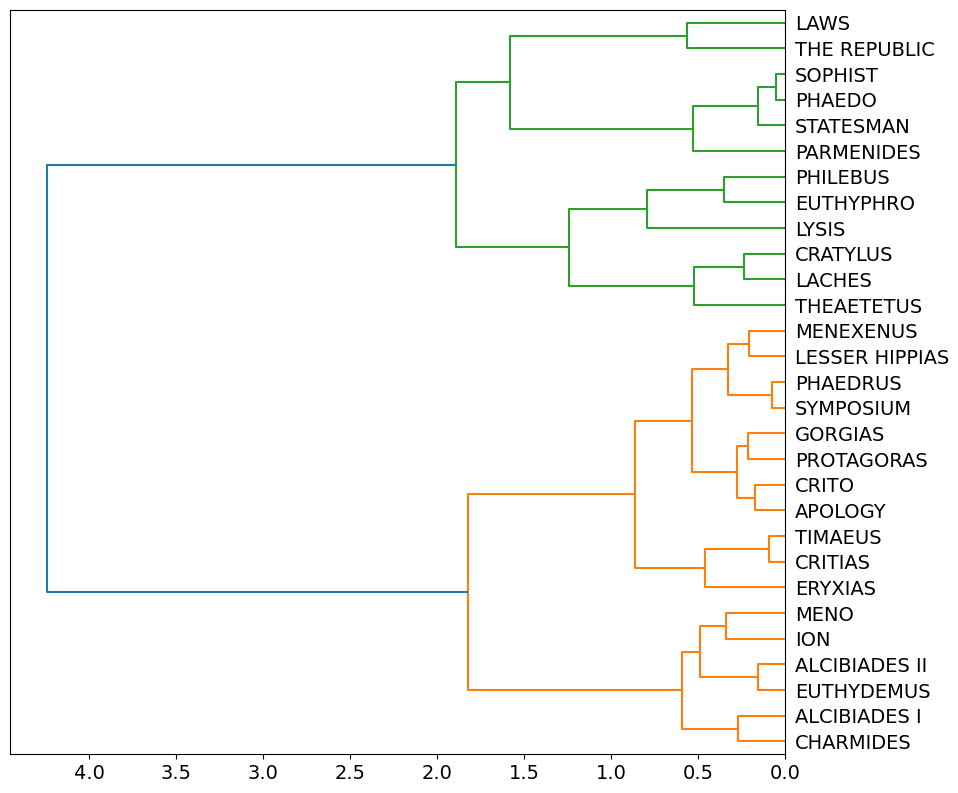

In [142]:
HAC(X).plot();

Rearranging and plotting a dendrogram that will show us the relationship between the 100 words with highest dfidf -

In [143]:
XV = LOADINGS.loc[VSHORT.sort_values('dfidf', ascending=False).head(100).index]
XV

pc_id,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
term_str,,,,,,,,,,
be,-0.069264,0.933530,-0.240215,0.148967,0.044343,-0.084100,-0.026941,0.032447,0.001941,0.082246
other,-0.030580,0.068499,-0.005829,-0.033166,-0.131987,0.545902,0.170772,0.418920,0.599016,-0.262704
true,0.990344,0.054685,-0.036101,0.043893,0.006580,0.023551,-0.011622,0.036235,0.009679,0.012717
say,-0.034680,-0.280575,-0.932005,0.205270,0.010398,-0.016083,0.022414,0.029462,0.023407,-0.003875
good,-0.035316,-0.095251,0.246160,0.941962,0.051397,-0.001654,0.009867,0.064484,0.013262,-0.030082
...,...,...,...,...,...,...,...,...,...,...
old,-0.003965,0.001504,0.001000,0.000424,-0.004361,0.004898,-0.001022,-0.003290,-0.000744,0.012784
point,-0.004572,0.000661,0.003098,-0.005367,-0.001797,0.002933,-0.000551,-0.008795,0.002232,0.012630
different,-0.005722,0.001115,0.001663,-0.010128,-0.010524,0.027685,0.010420,0.016890,-0.025225,0.007751


<Figure size 640x480 with 0 Axes>

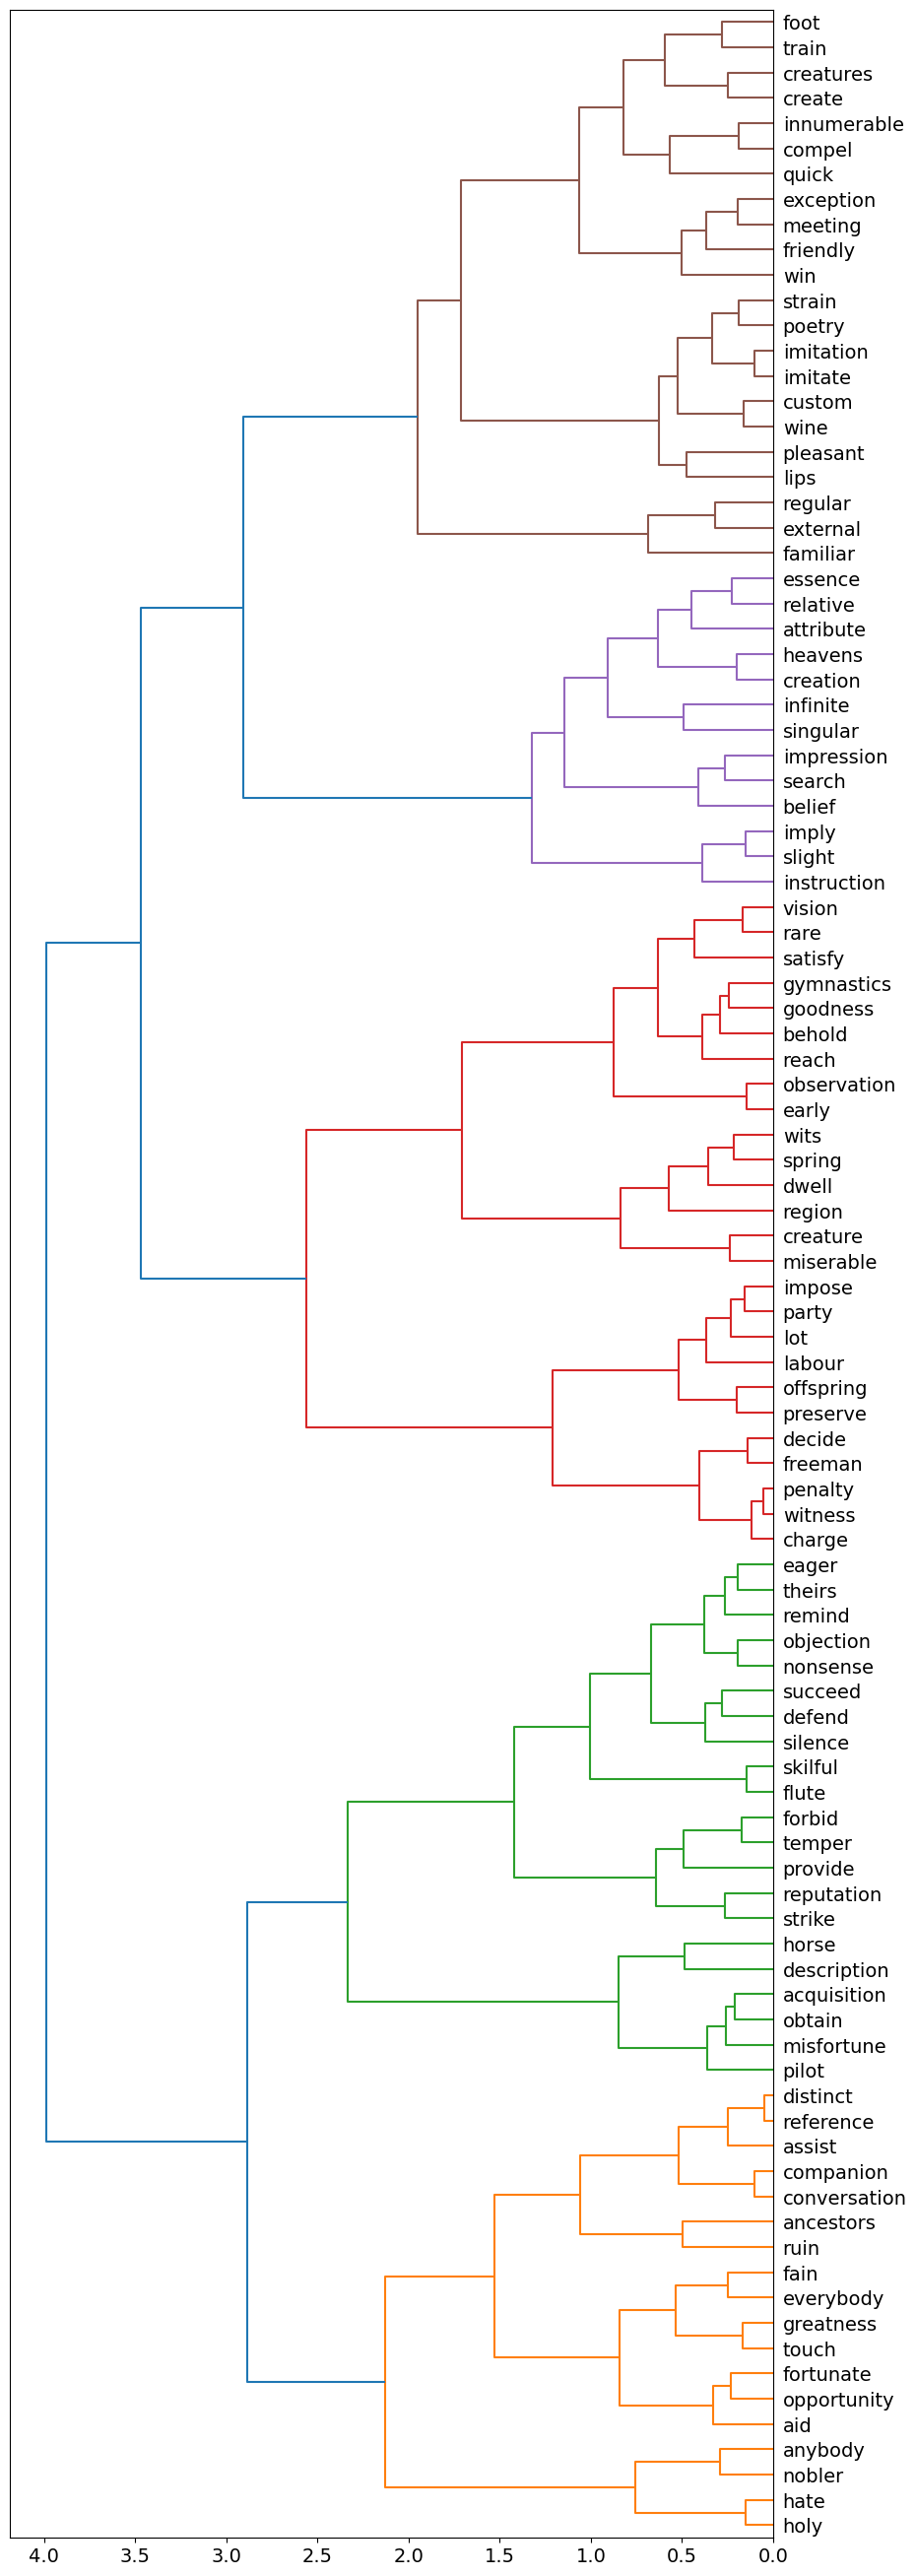

In [62]:
HAC(XV).plot()

### Output the data

In [148]:
COMPS.to_csv(f'{data_out}/{data_prefix}-COMPS-PARA.csv')
DCM.to_csv(f'{data_out}/{data_prefix}-DCM-PARA.csv')
LOADINGS.to_csv(f'{data_out}/{data_prefix}-LOADINGS-PARA.csv')